<a href="https://colab.research.google.com/github/jeffreyhsu2820/Machine-Learning/blob/main/Project/House_Price_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to myDrive:

In [ ]:
from google.colab import drive
import os
import zipfile
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Master/2020_fall/Machine_learning/修課 - 吳沛遠/Final Project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Master/2020_fall/Machine_learning/修課 - 吳沛遠/Final Project


Import packages:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Exploration Analysis for Data Pre-processing:

Read Training Data  
Data Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques  

In [ ]:
train = pd.read_csv('train.csv')
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [ ]:
# train data without NaN
train_wo_nan = train[train.columns[~train.isnull().any()]]
train_wo_nan

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 62 columns]

In [ ]:
type_dct = {str(k): list(v) for k, v in train.groupby(train.dtypes, axis=1)}
type_dct.keys()

dict_keys(['int64', 'float64', 'object'])

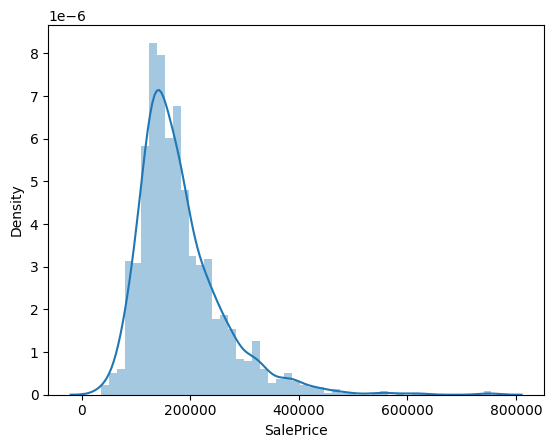

In [ ]:
# there is a skewness on the histogram of salesprice, transformation log(x+1) is applied
sns.distplot(train['SalePrice'])
train['SalePrice'] = np.log1p(train['SalePrice'])

In [ ]:
## categorical object
for col in train_wo_nan[train_wo_nan.columns[train_wo_nan.dtypes==np.object]].columns.tolist():
    print(train[col].value_counts())
    print("\n")
# "MSZoning": one-hot
# "Street": one-hot
# "LotShape": 1 to 4
# "LandContour": 1 to 4
# "Utilities": 1 to 4
# "LotConfig"; one hot
# "LandSlope": 1 to 3
# "Neighborhood": one hot
# "Condition1", "Condition2": one-hot
# "BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd": one-hot
# "ExterQual": 1 to 5
# "ExterCond": 1 to 5
# "Foundation": one hot
# "Heating": one hot
# "HeatingQC": 1 to 5
# "CentralAir": 0,1
# "KitchenQual": 1 to 5
# "Functional": 1 to 5
# "PavedDrive": 1 to 3
# "SaleType": one hot
# "SaleCondition": one hot

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Norm      1260
Feedr     

In [ ]:
# 補值
train.columns[train.isnull().any()].tolist()
# 'LotFrontage'(conti.): filled up with neighborhood
# 'Alley': NaN filled up with No alley access (a new category), 1 to 3 
# 'MasVnrType': NaN filled up with CBlock, one-hot
# 'MasVnrArea'(conti.): neighborhood 
# 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2': if all these columns are nan, fill up Na (no basement); else, then 1 to (6, 7)
# 'Electrical': one-hot
# 'FireplaceQu': if "Fireplaces"==0 then 'FireplaceQu'='NA'; else, neghborhood. 1 to 6
# 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond': if all these columns are nan, fill up NA (No Garage), and GarageYrBlt==0; GarageYrBlt=max(GarageYrBlt)+1-GarageYrBlt  
# "PoolQC": if "PoolArea"==0, then NA. from 1 to 6
# "Fence": na==1 to 6
# "MiscFeature": turn NA to "None", then one-hot

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

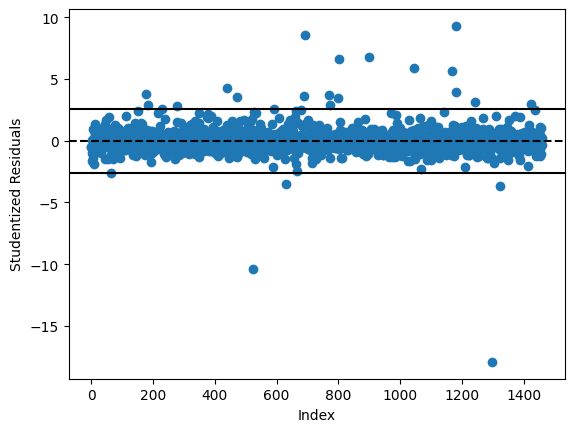

In [ ]:
## Removing outlier: remove the points that studentized residuals which is larger than the 0.5%, 99.5% t-dist. quantile 
import statsmodels.api as sm

conti_var = train_wo_nan[train_wo_nan.columns[train_wo_nan.dtypes!=np.object]].columns.tolist()[1:-1]
x = train_wo_nan[conti_var]
x = sm.add_constant(x)
y = train_wo_nan['SalePrice']
model = sm.OLS(y, x).fit() 
# calculate studentized residuals 
stud_res = model.outlier_test() 

# display studentized residuals 
import matplotlib.pyplot as plt 
from scipy.stats import t

# define predictor variable values and studentized residuals 
x = x.index.tolist()
y = stud_res['student_resid']

# create scatterplot of predictor variable vs. studentized residuals
plt.scatter(x, y) 
plt.axhline(y = stats.t(df=len(y)-len(conti_var)-1).ppf((0.005)), color = 'black', linestyle = '-')
plt.axhline(y = stats.t(df=len(y)-len(conti_var)-1).ppf((0.995)), color = 'black', linestyle = '-')
plt.axhline(y = 0, color = 'black', linestyle = '--') 
plt.xlabel('Index') 
plt.ylabel('Studentized Residuals') 


train_wo_out = train[(y<stats.t(df=len(y)-len(conti_var)-1).ppf((0.995))) & (y>stats.t(df=len(y)-len(conti_var)-1).ppf((0.005)))]

In [ ]:
## 補值
train_wo_out["Alley"][train_wo_out["Alley"].isnull()]=0
train_wo_out["Alley"][train_wo_out["Alley"]=='Grvl']=1
train_wo_out["Alley"][train_wo_out["Alley"]=='Pave']=2
train_wo_out["Alley"]=pd.to_numeric(train_wo_out["Alley"])

train_wo_out['MasVnrType'][train_wo_out['MasVnrType'].isnull()] = 'CBlock'

Bsmt_idx = train_wo_out[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().all(axis=1)
qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  train_wo_out[col][Bsmt_idx] = 0
  for q in qual:
    train_wo_out[col][train_wo_out[col]==q] = qual[q]

Exp_Qual = {'Gd':3, 'Av':2, 'Mn':1, 'No':0}
for q in Exp_Qual:
  train_wo_out['BsmtExposure'][train_wo_out['BsmtExposure']==q] = Exp_Qual[q]

Fin_Qual = {"GLQ":5,"ALQ":4,"BLQ":3,"Rec":2,"LwQ":1,"Unf":0}
for q in Fin_Qual:
  train_wo_out['BsmtFinType1'][train_wo_out['BsmtFinType1']==q] = Fin_Qual[q]
  train_wo_out['BsmtFinType2'][train_wo_out['BsmtFinType2']==q] = Fin_Qual[q]

for i in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  train_wo_out[i] = pd.to_numeric(train_wo_out[i])


train_wo_out['FireplaceQu'][train_wo_out['Fireplaces']==0]=0
for q in qual:
  train_wo_out['FireplaceQu'][train_wo_out['FireplaceQu']==q] = qual[q] 
train_wo_out['FireplaceQu'] = pd.to_numeric(train_wo_out['FireplaceQu'])

Garage_idx = train_wo_out[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().all(axis=1)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  train_wo_out[col][Garage_idx] = 'None'
train_wo_out['GarageYrBlt'] = train_wo_out['GarageYrBlt'].max()+1-train_wo_out['GarageYrBlt']
train_wo_out['GarageYrBlt'][Garage_idx]=0
train_wo_out['GarageYrBlt'] = pd.to_numeric(train_wo_out['GarageYrBlt'])


train_wo_out['PoolQC'][train_wo_out['PoolArea']==0]=0
for q in qual:
  train_wo_out['PoolQC'][train_wo_out['PoolQC']==q] = qual[q]  
train_wo_out['PoolQC'] = pd.to_numeric(train_wo_out['PoolQC'])

train_wo_out['Fence'][train_wo_out['Fence'].isnull()]=0
FenceQual = {"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1}
for q in FenceQual:
  train_wo_out['Fence'][train_wo_out['Fence']==q] = FenceQual[q]
train_wo_out['Fence'] = pd.to_numeric(train_wo_out['Fence'])

train_wo_out["MiscFeature"][train_wo_out["MiscFeature"].isnull()] = "None"

## several non consistent data filled up with mode or 0
train_wo_out['BsmtExposure'][train_wo_out['BsmtExposure'].isnull()] = 0
train_wo_out['BsmtFinType2'][train_wo_out['BsmtFinType2'].isnull()] = 0
train_wo_out['Electrical'][train_wo_out['Electrical'].isnull()] = train_wo_out['Electrical'].mode().iloc[0]

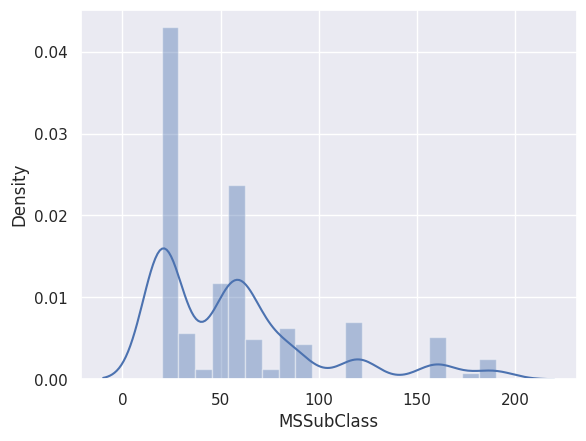

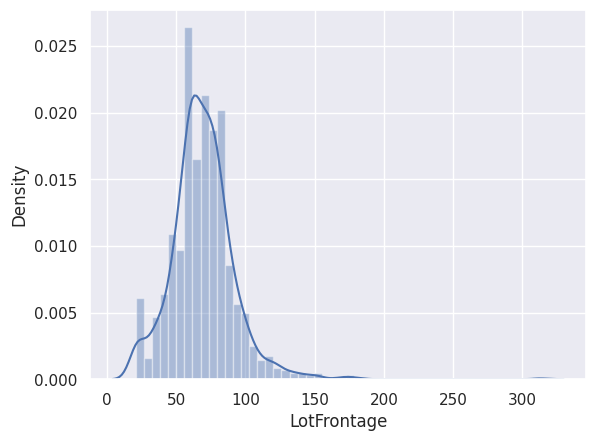

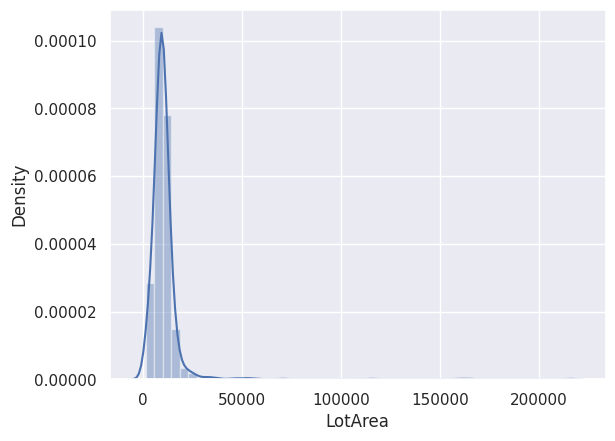

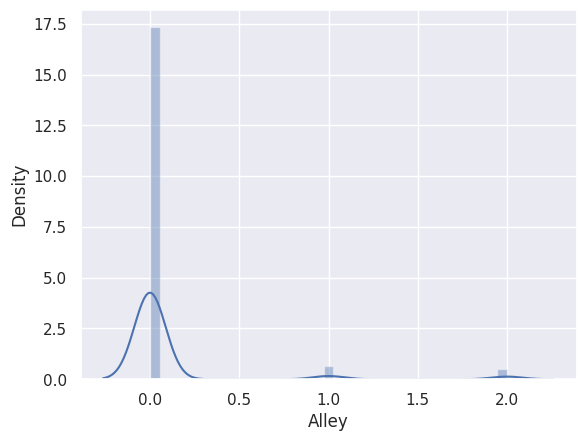

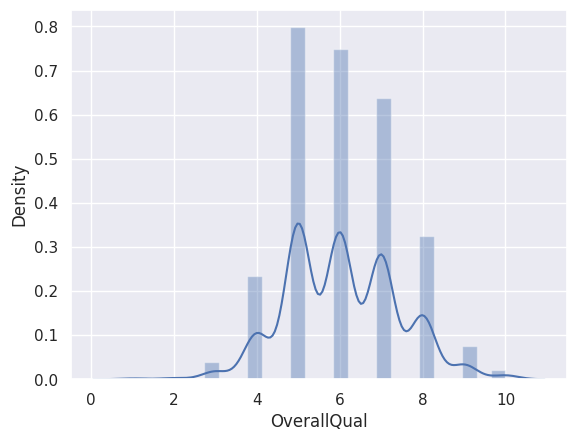

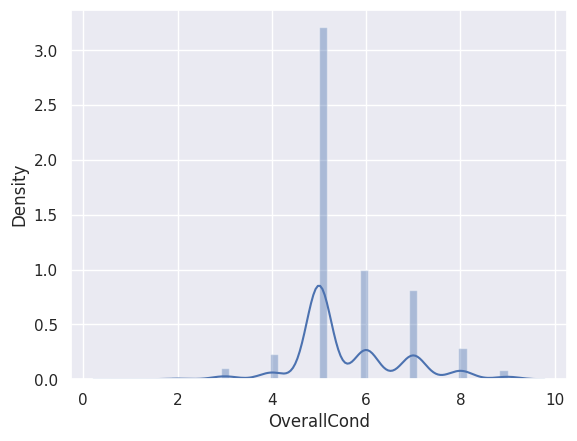

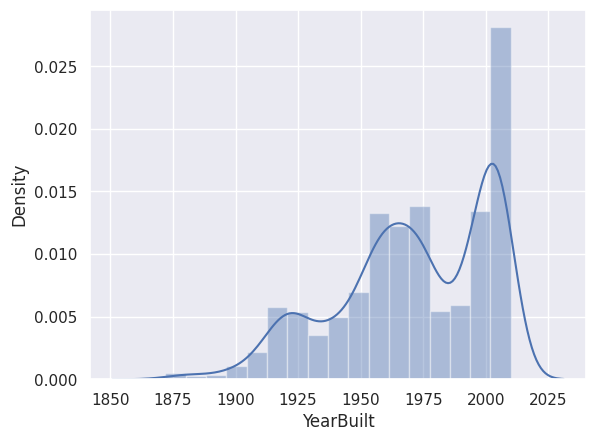

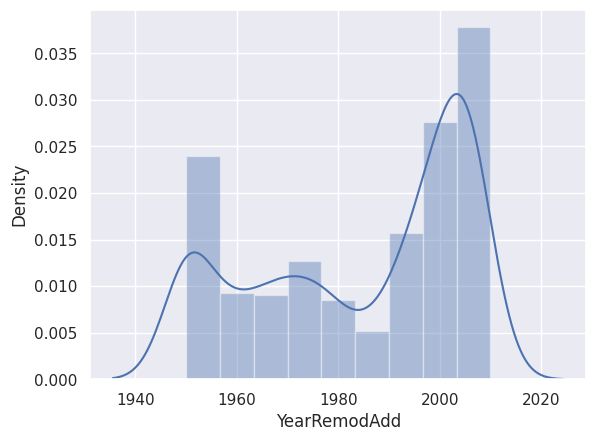

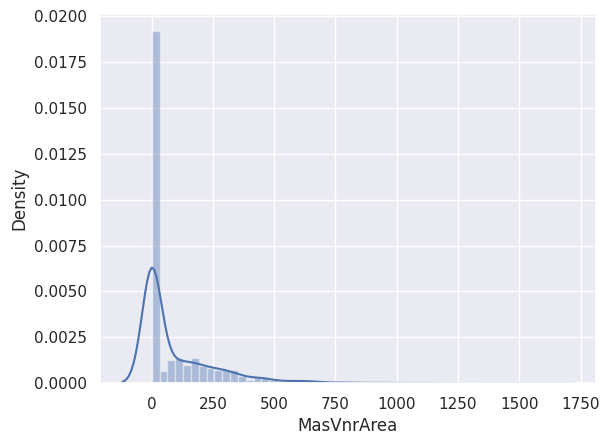

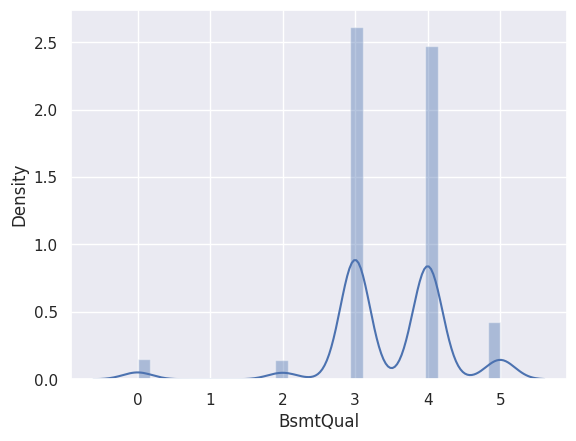

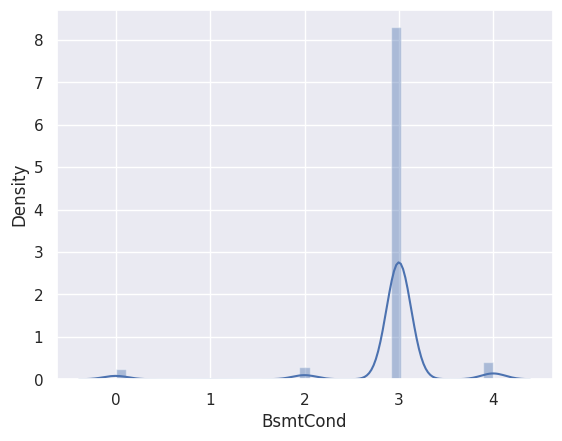

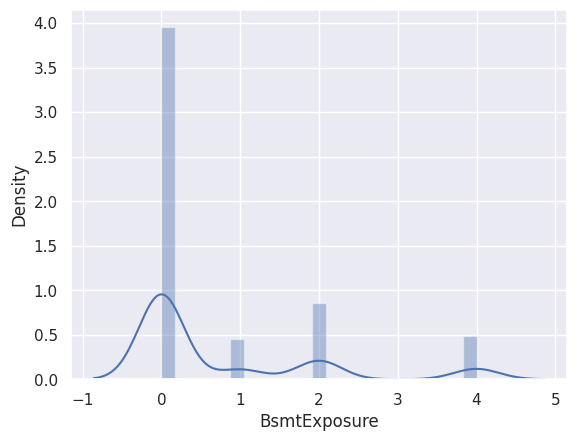

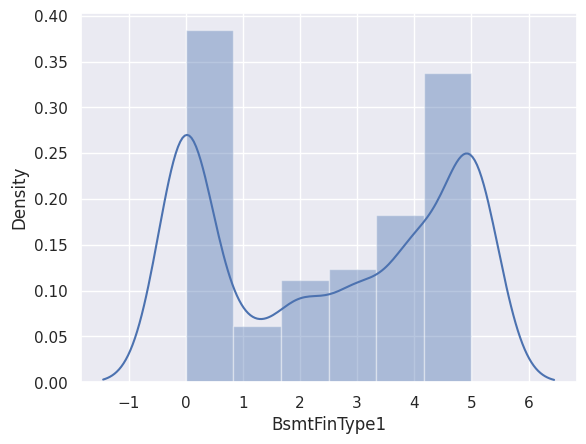

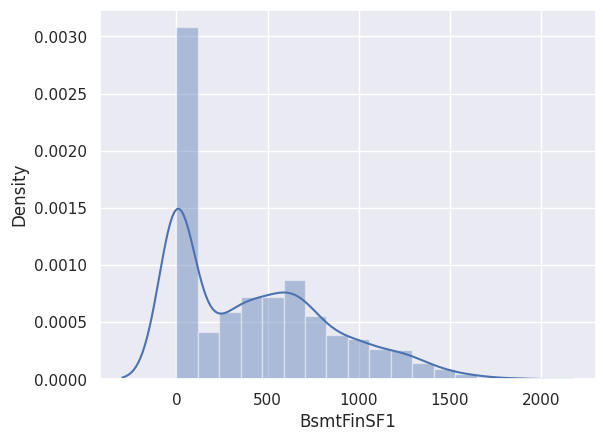

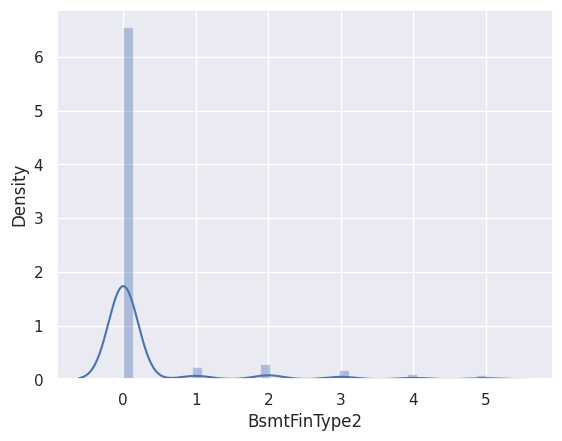

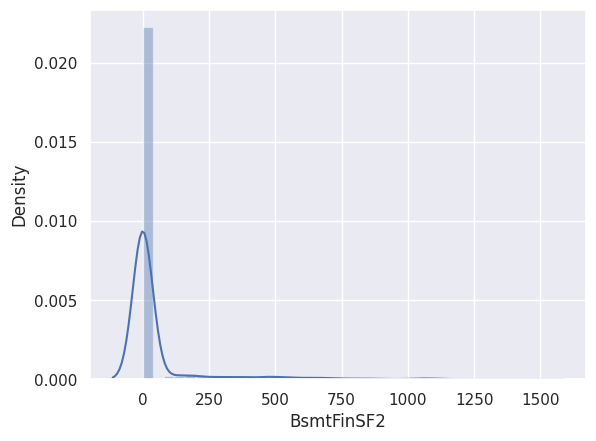

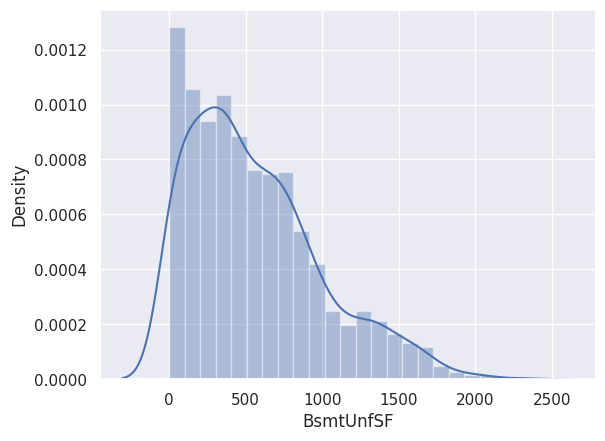

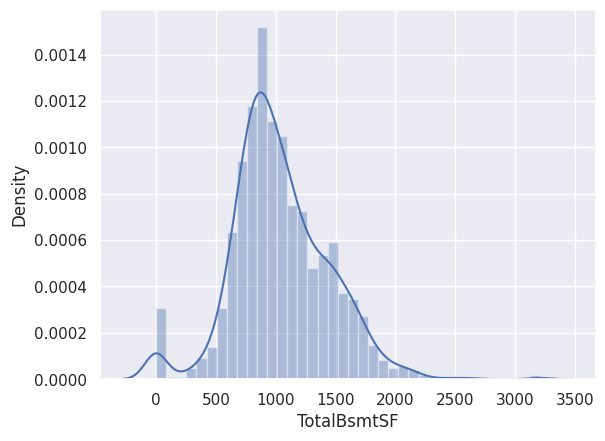

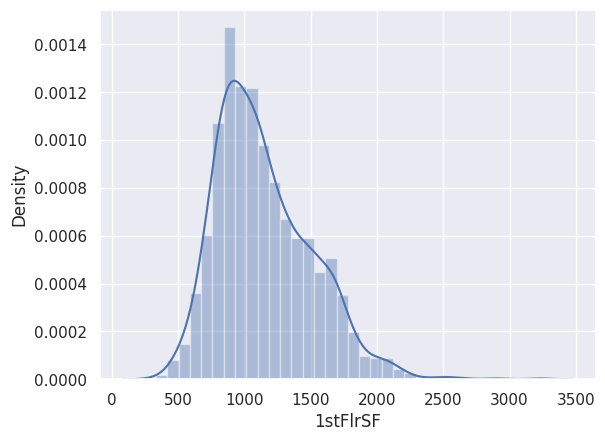

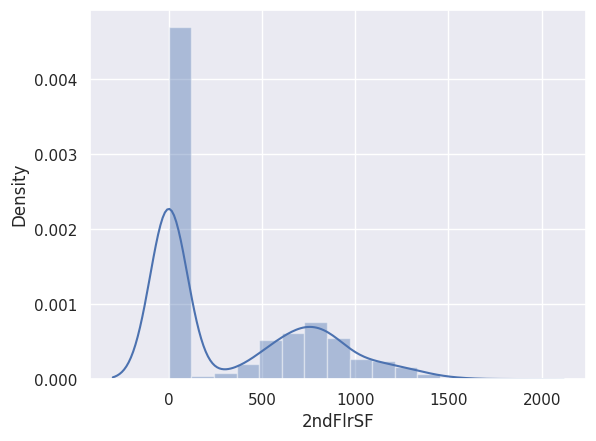

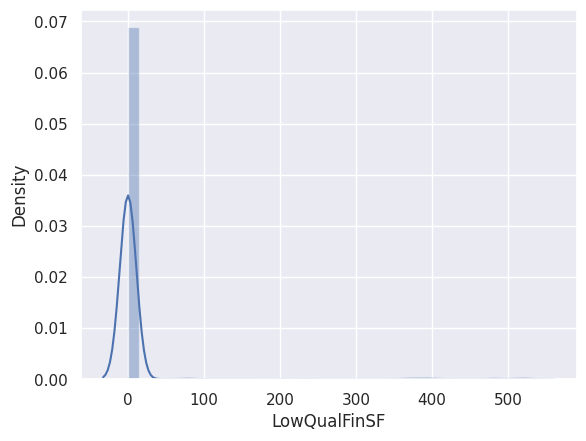

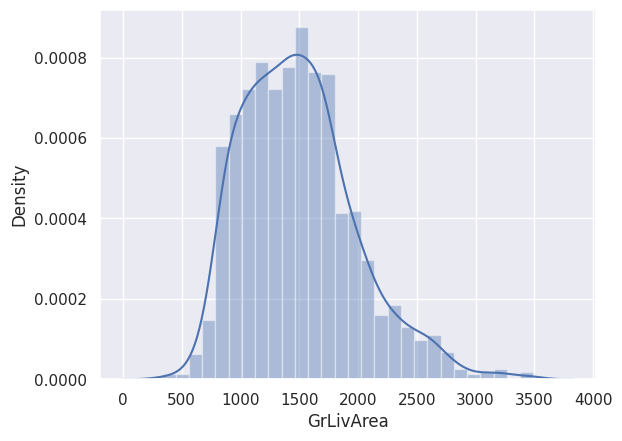

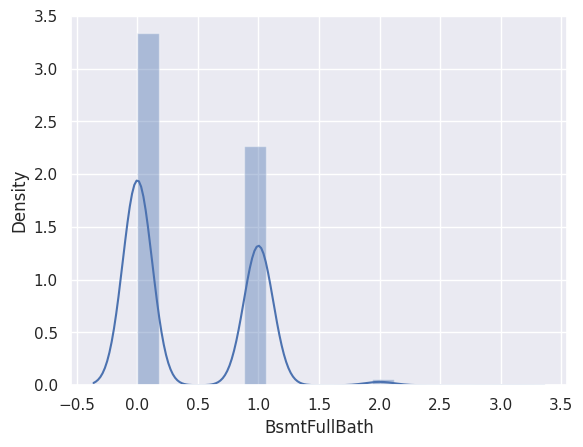

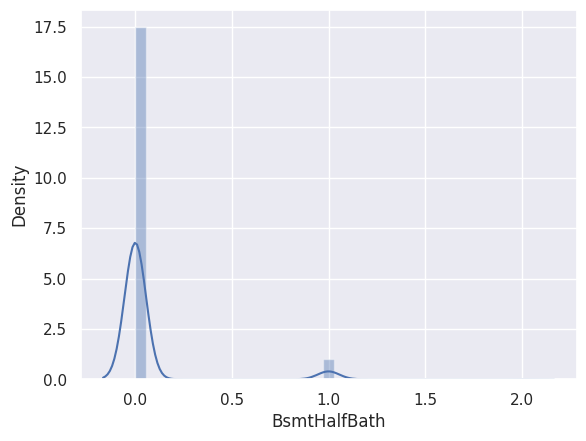

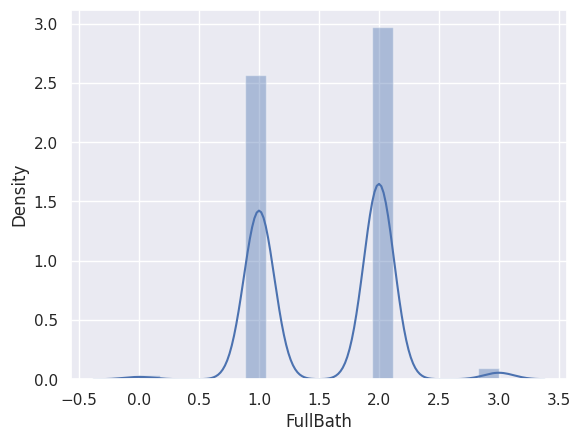

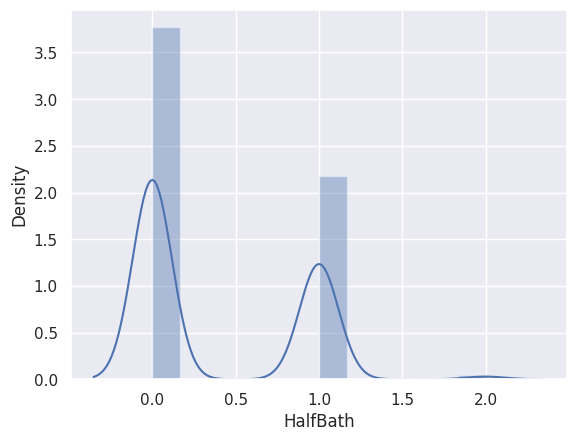

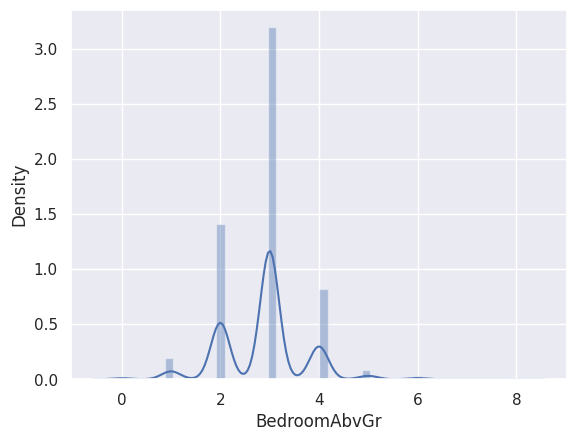

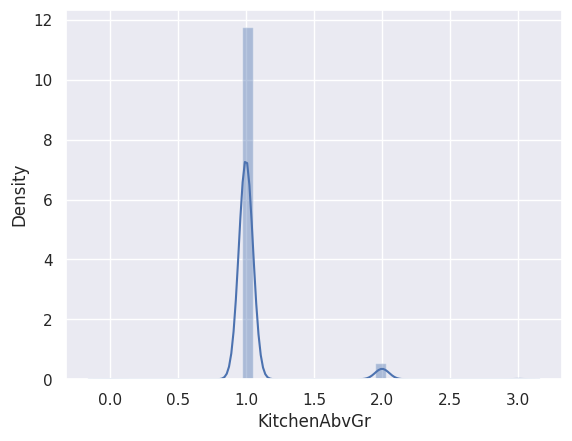

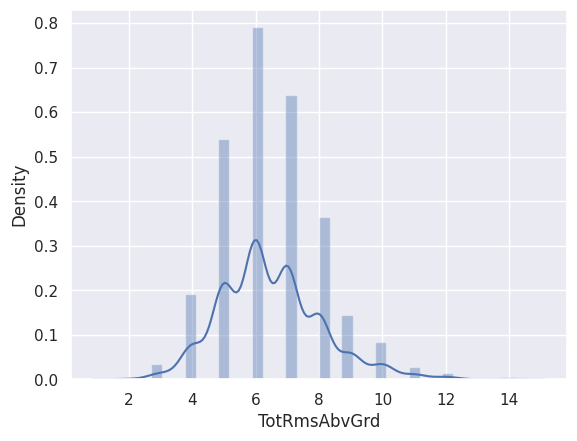

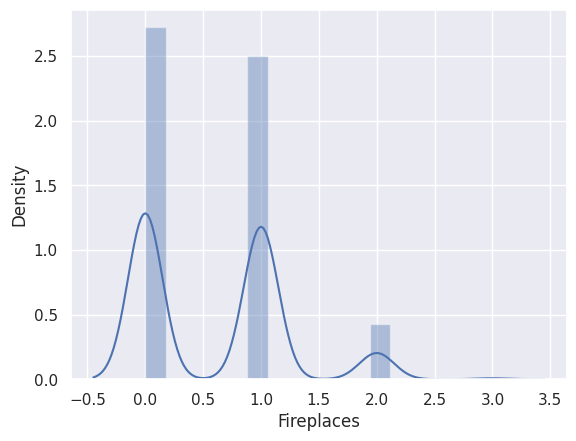

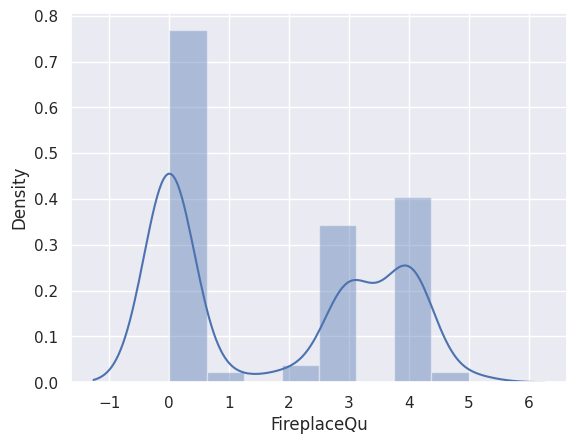

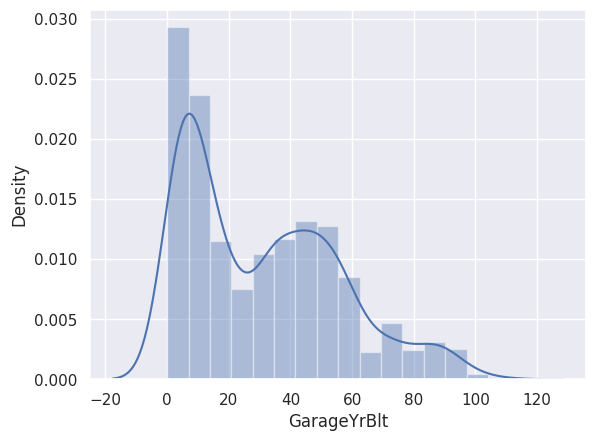

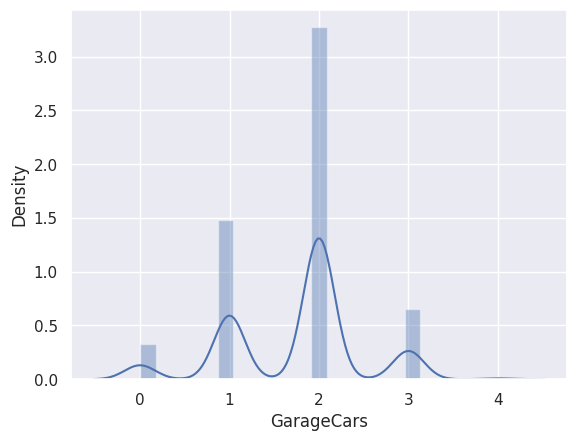

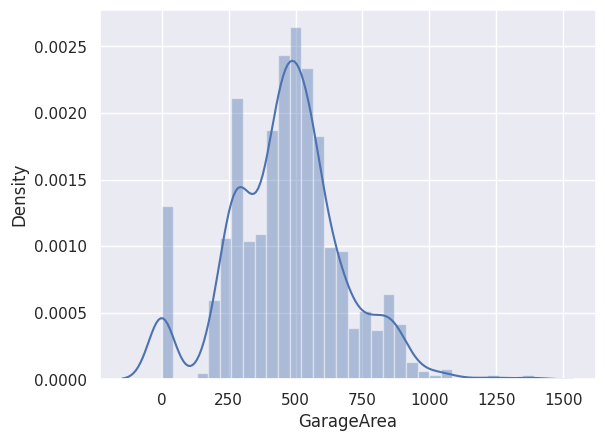

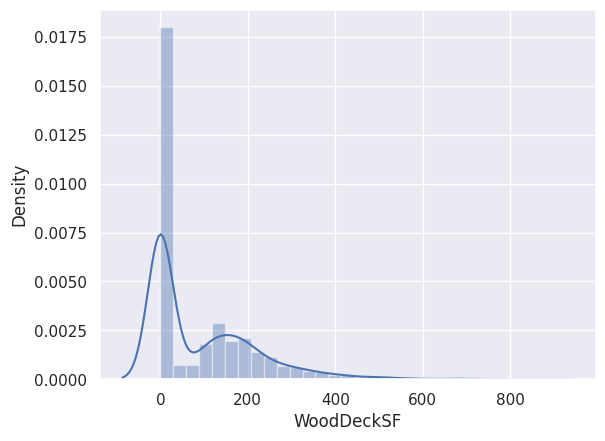

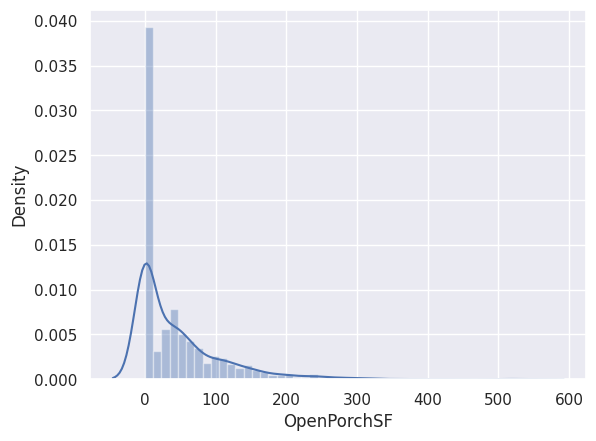

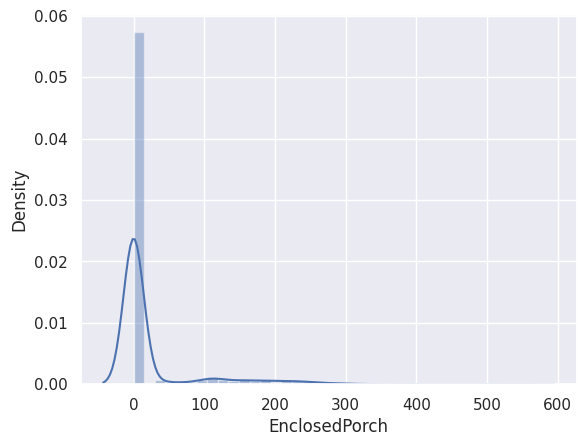

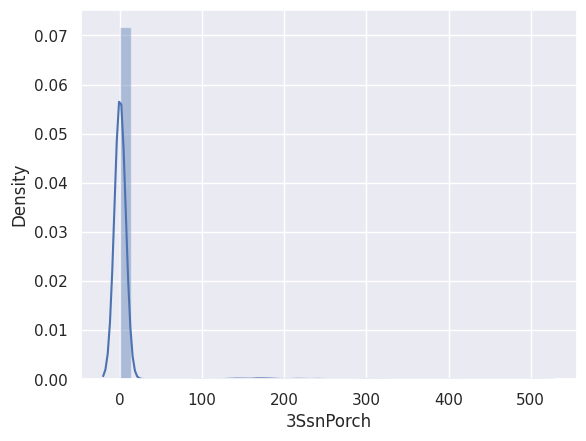

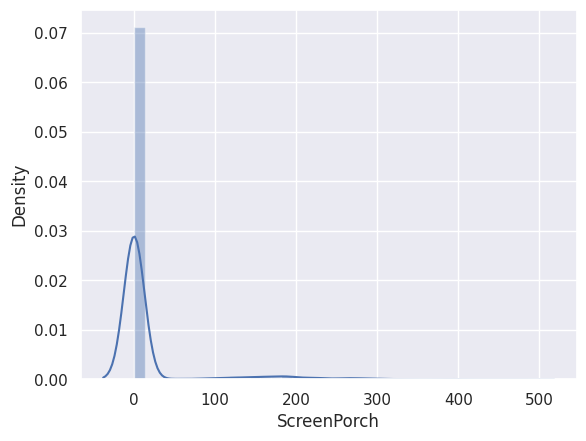

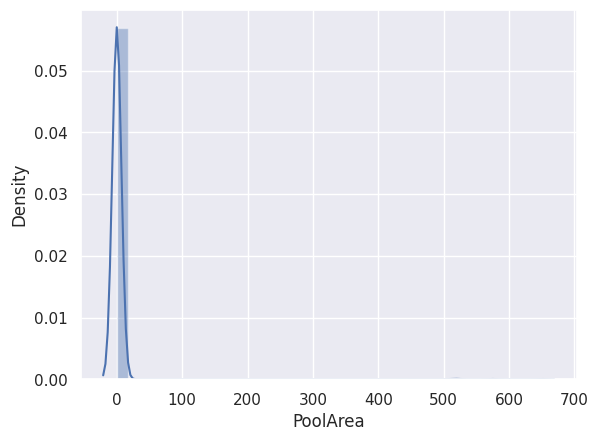

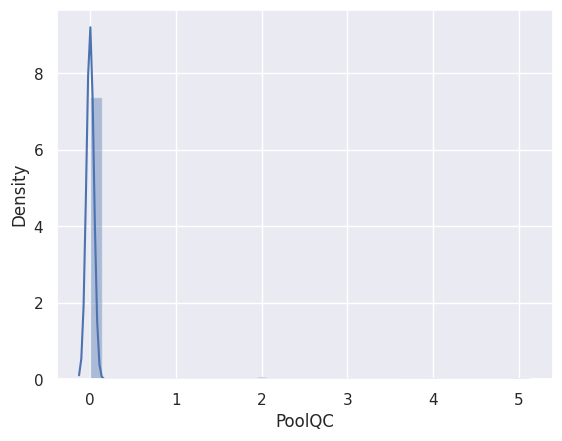

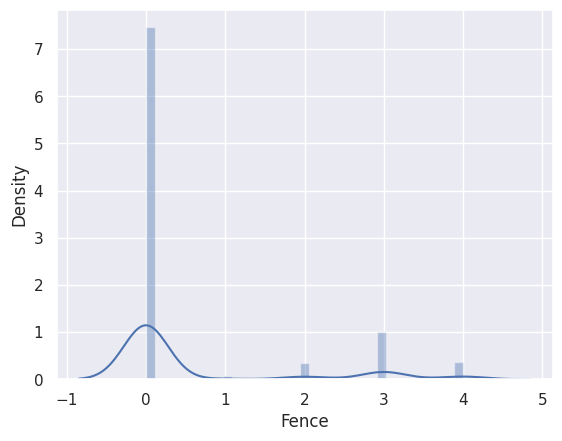

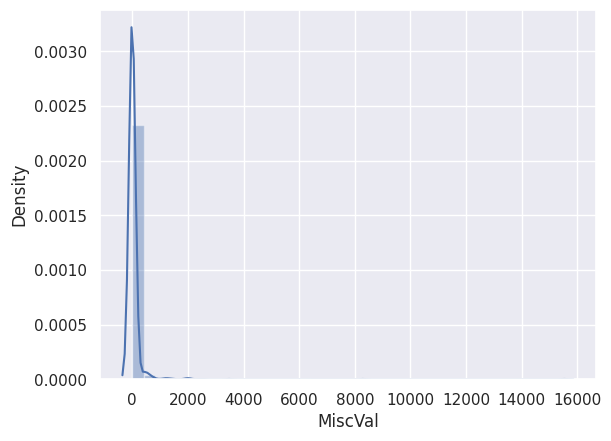

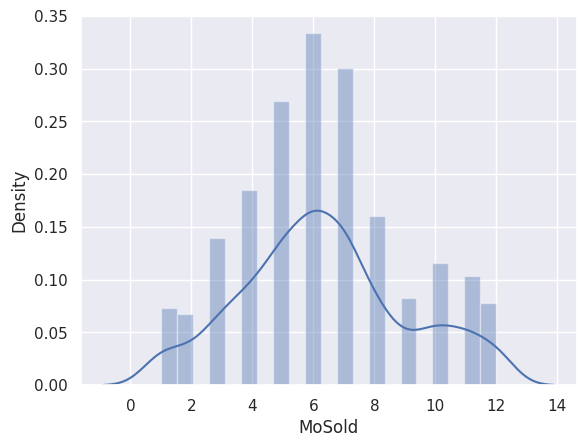

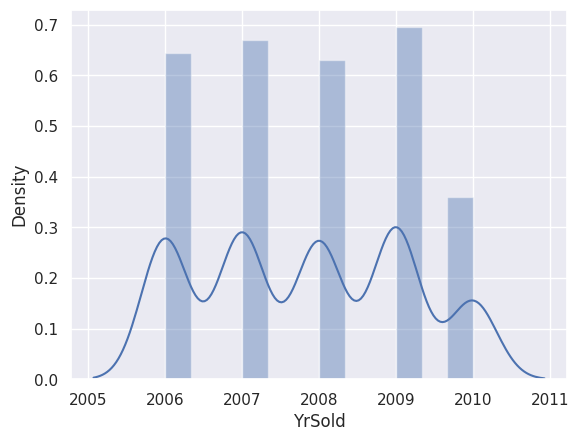

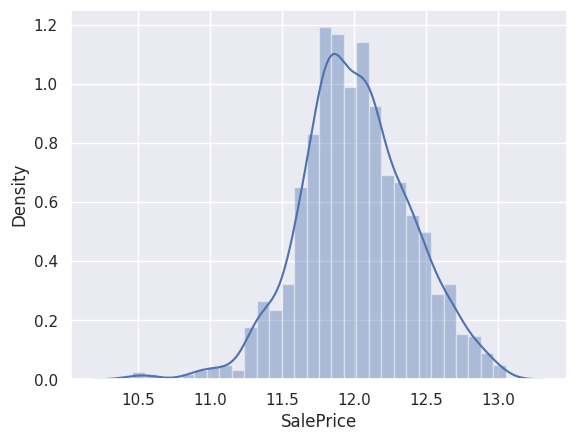

In [ ]:
## several variables exists skewness heance we transformed them into log(x+1)
for col in train_wo_out[train_wo_out.columns[train_wo_out.dtypes!=np.object]].columns.tolist()[1:]:
  sns.set()
  sns.distplot(train_wo_out[col])
  plt.show()
cols = ['LotFrontage','LotArea', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
'1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea','PoolArea','MiscVal']
for col in cols:
  train_wo_out[col]=np.log1p(train_wo_out[col])

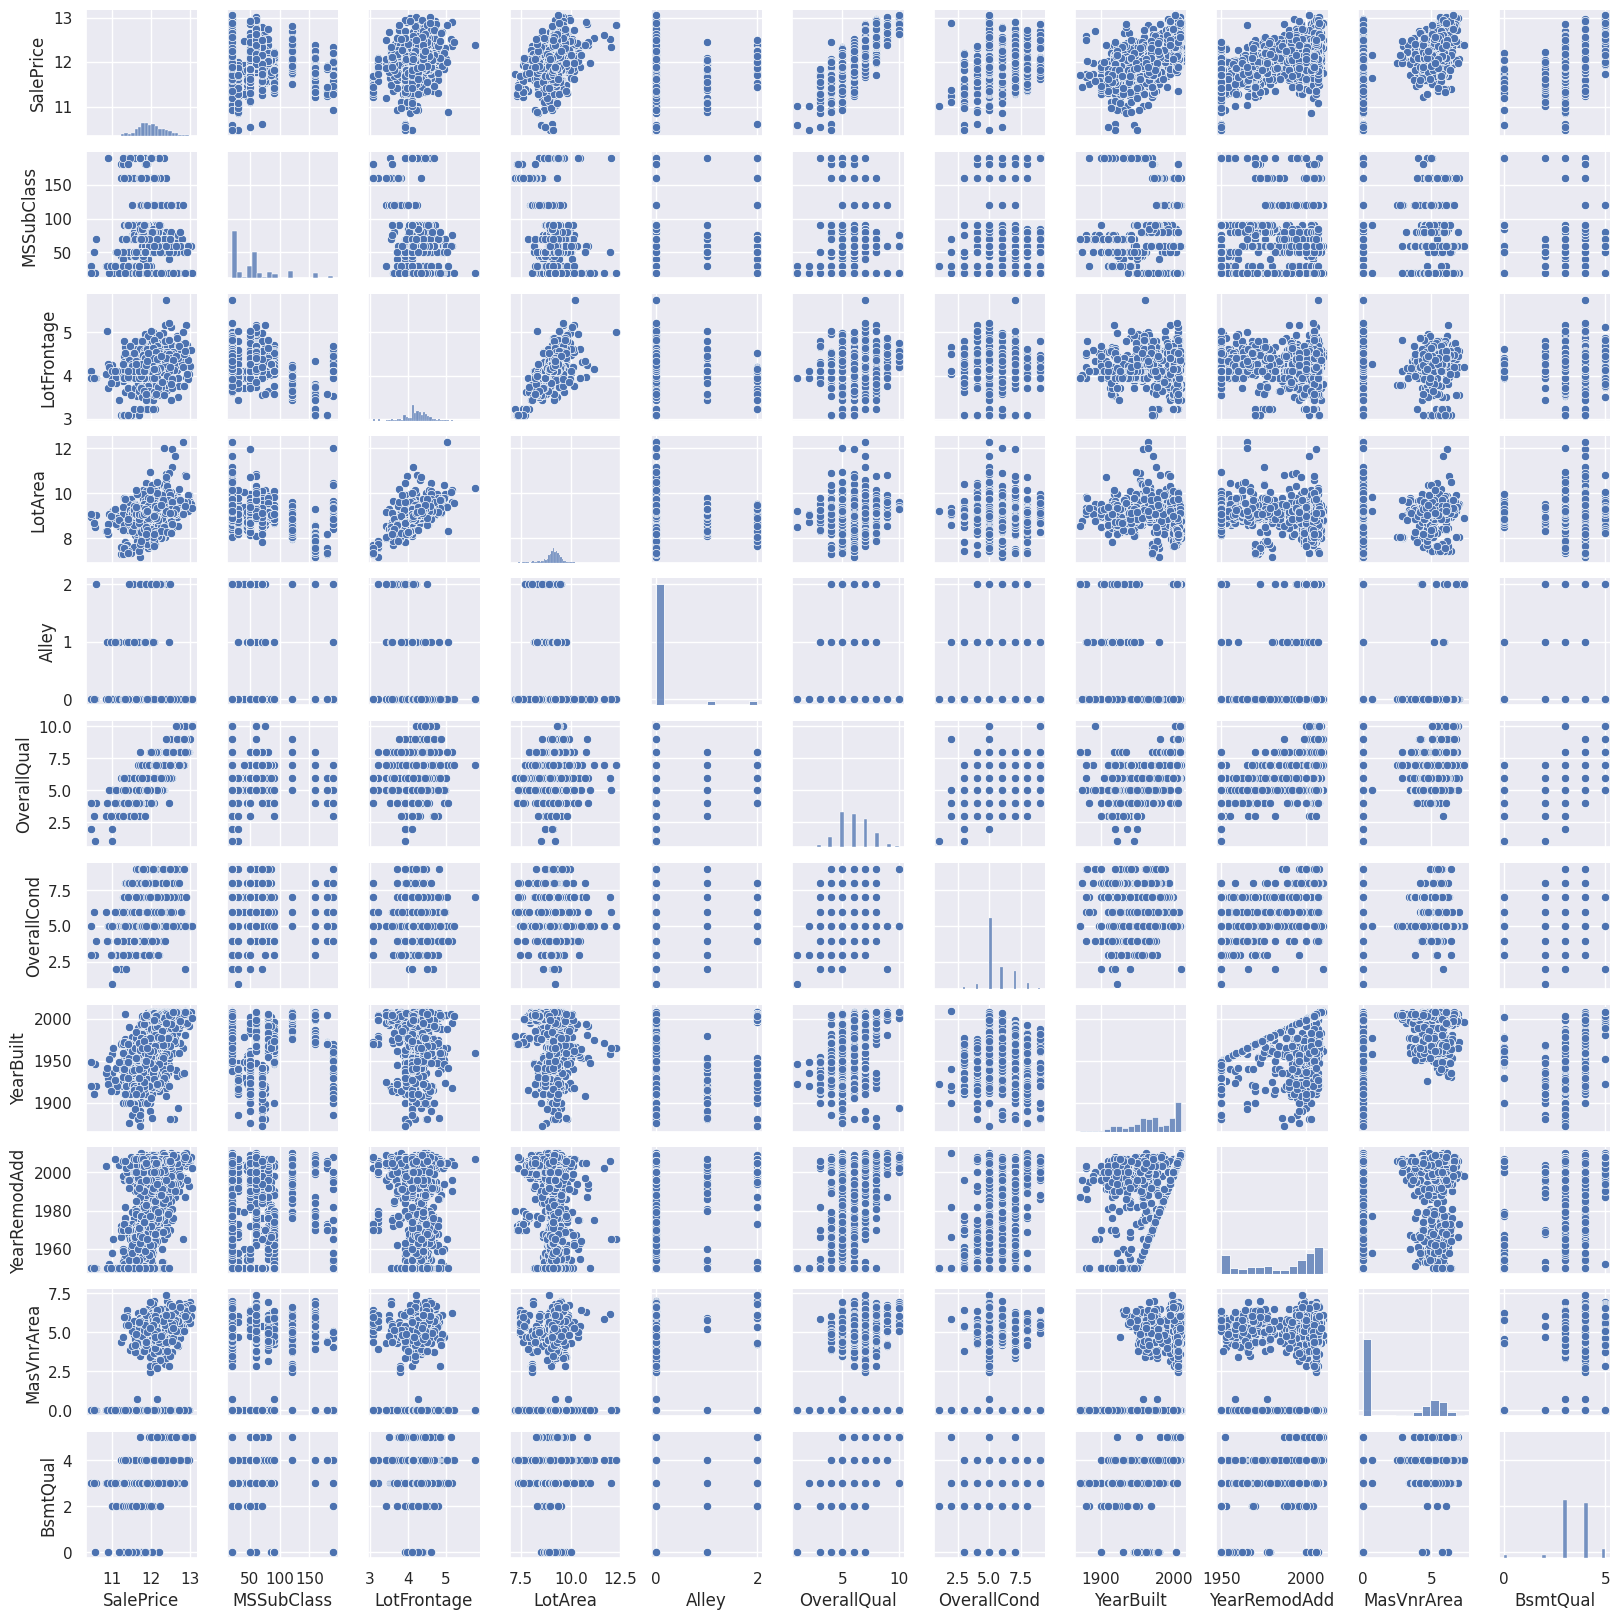

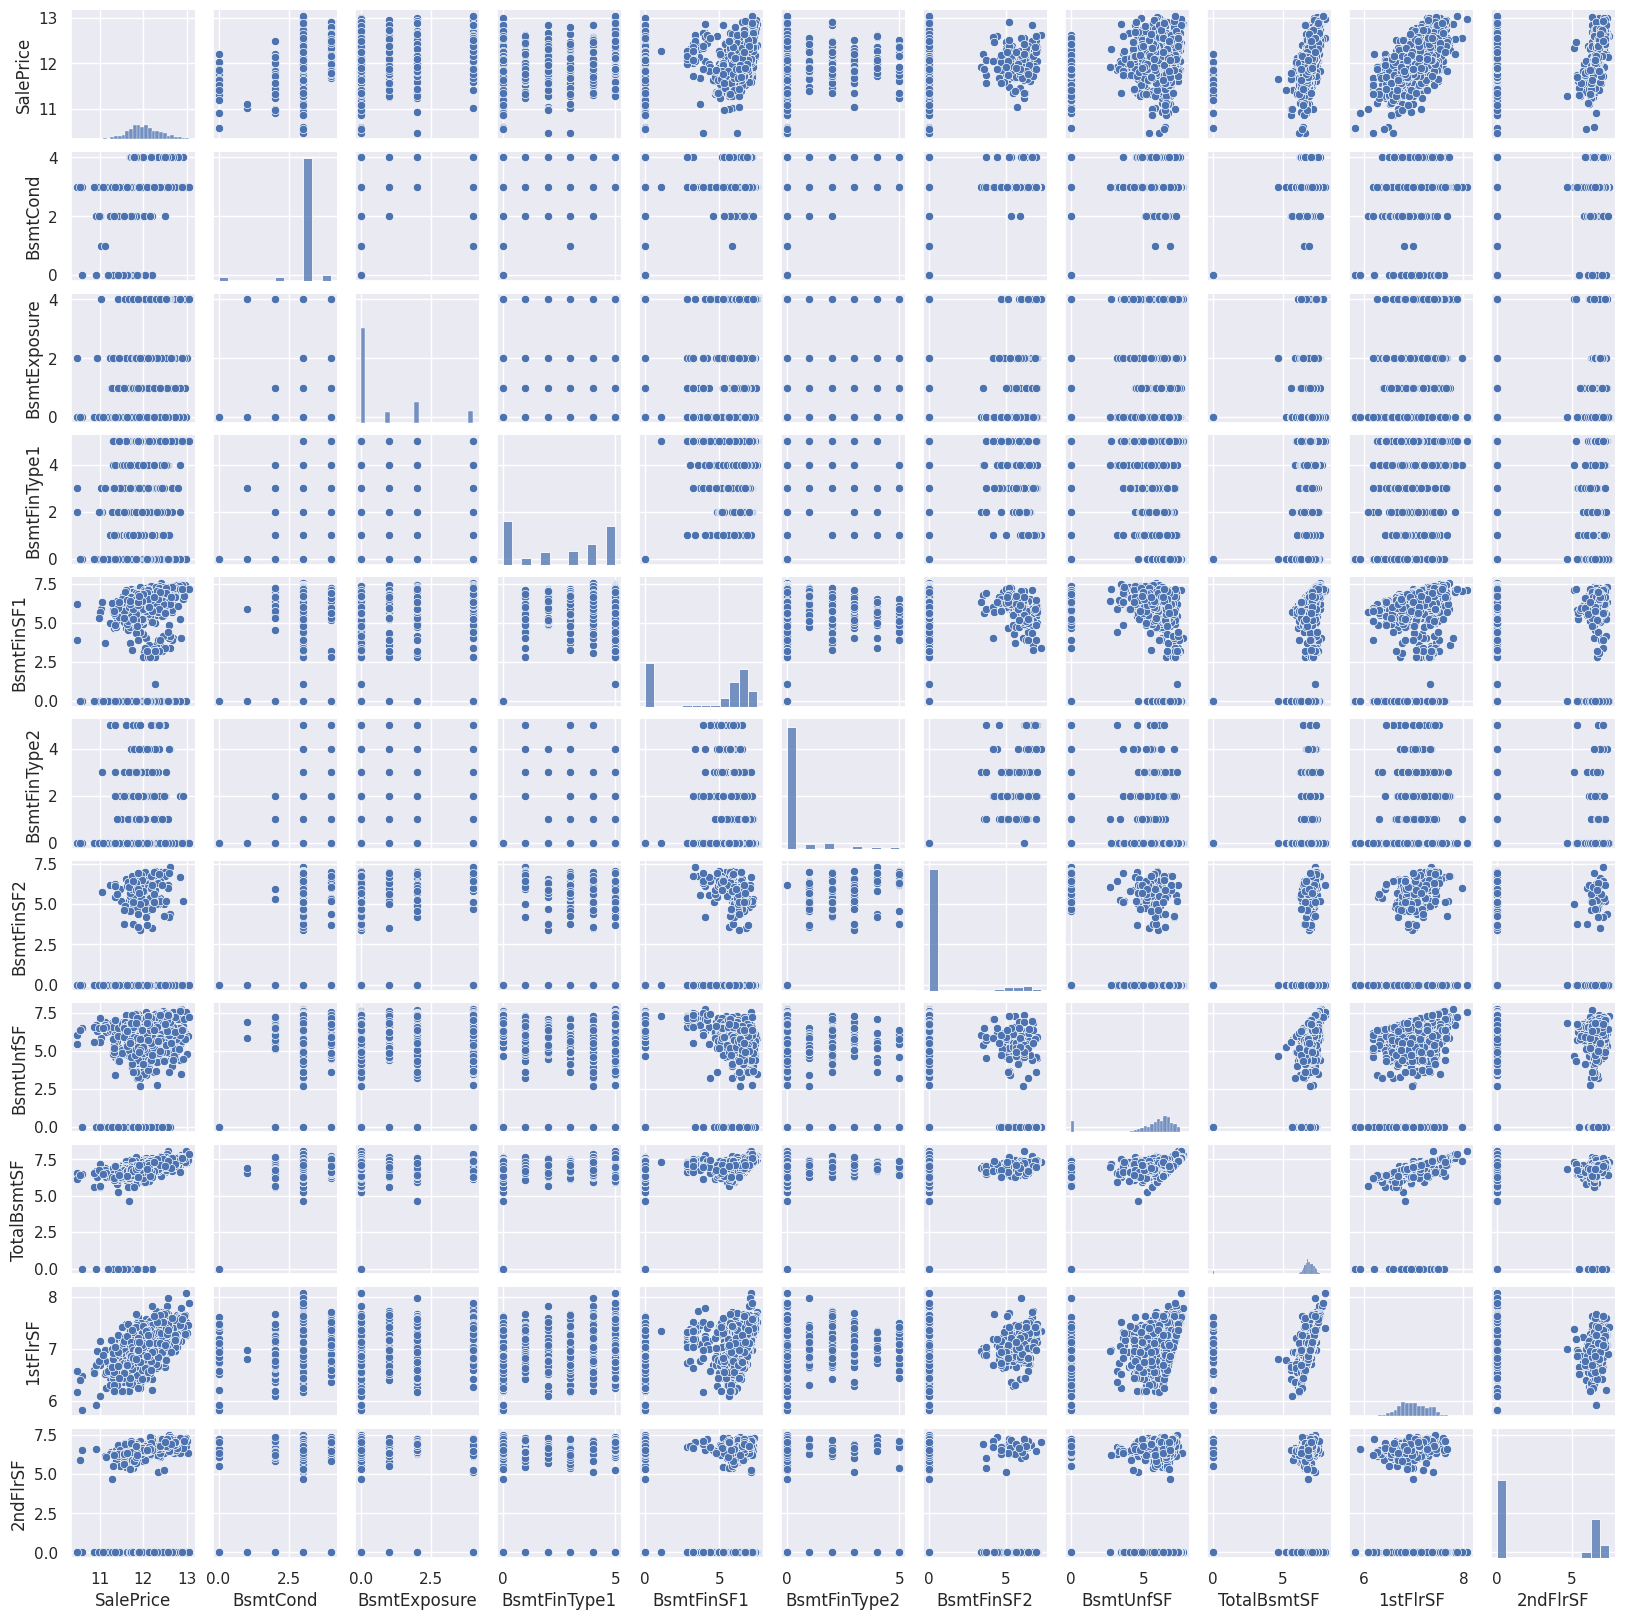

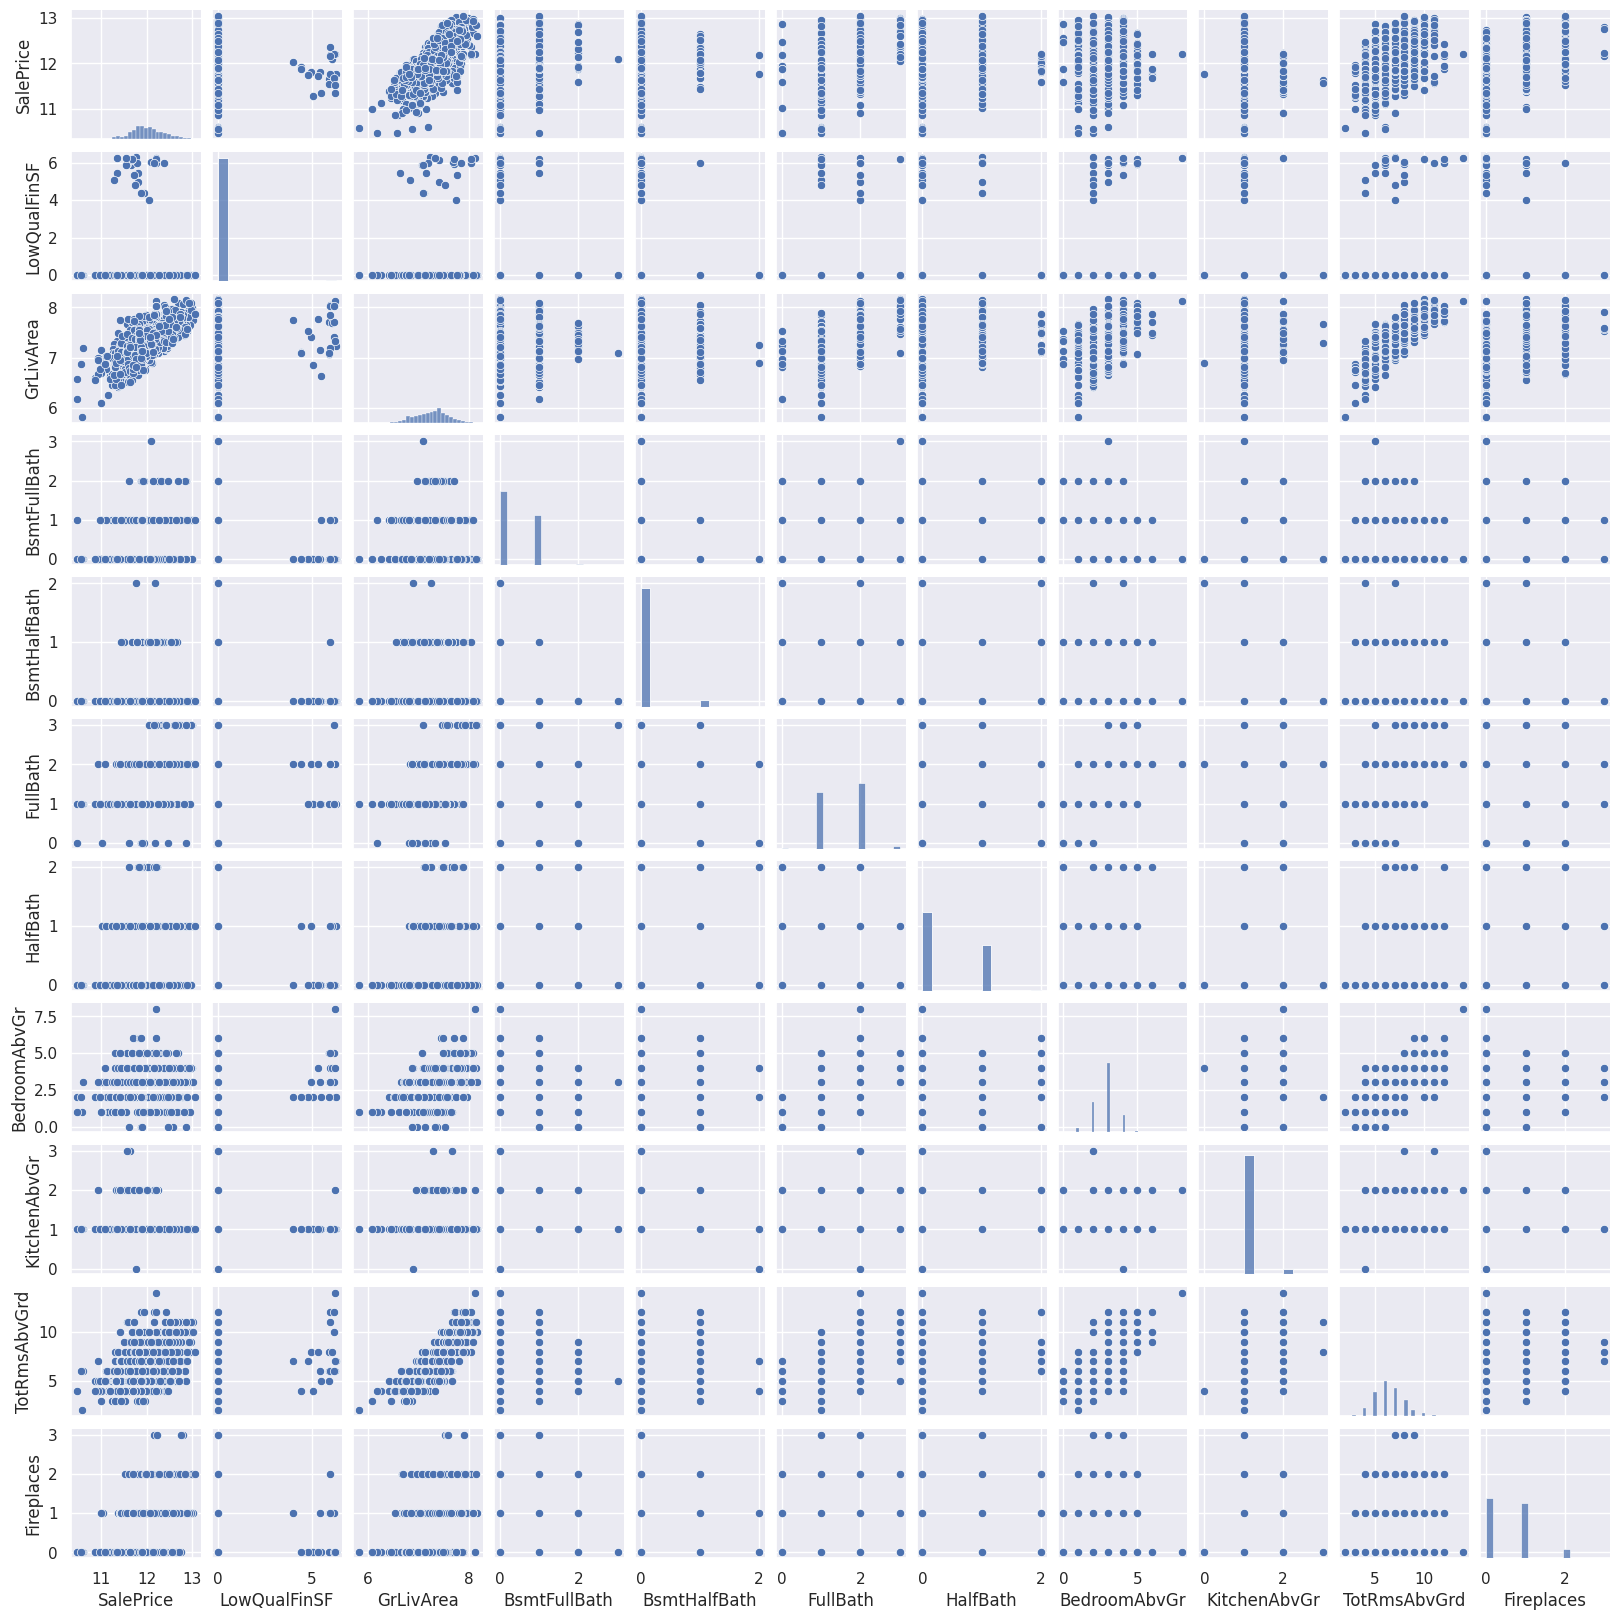

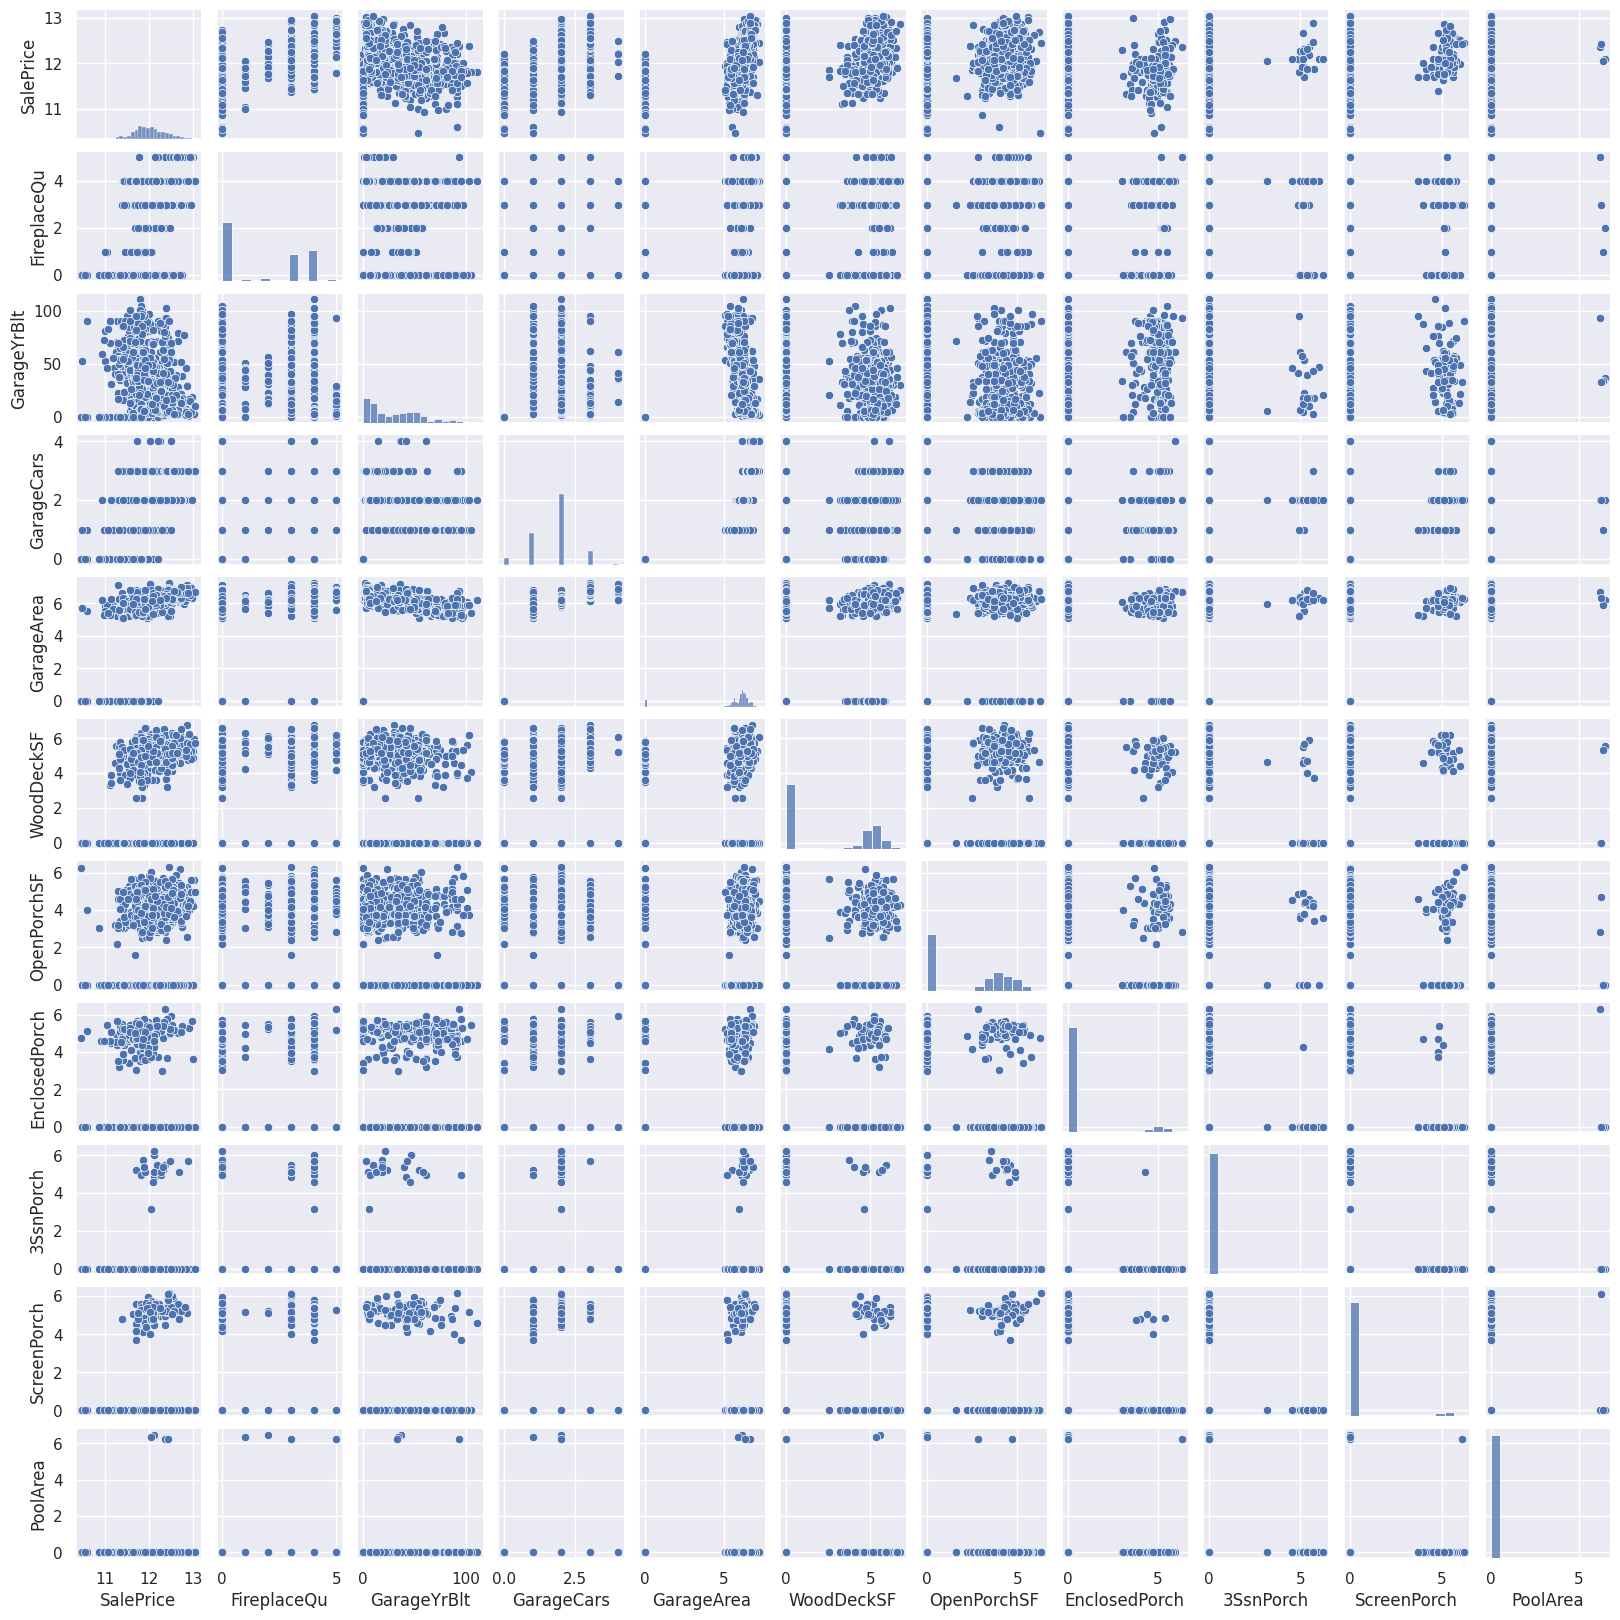

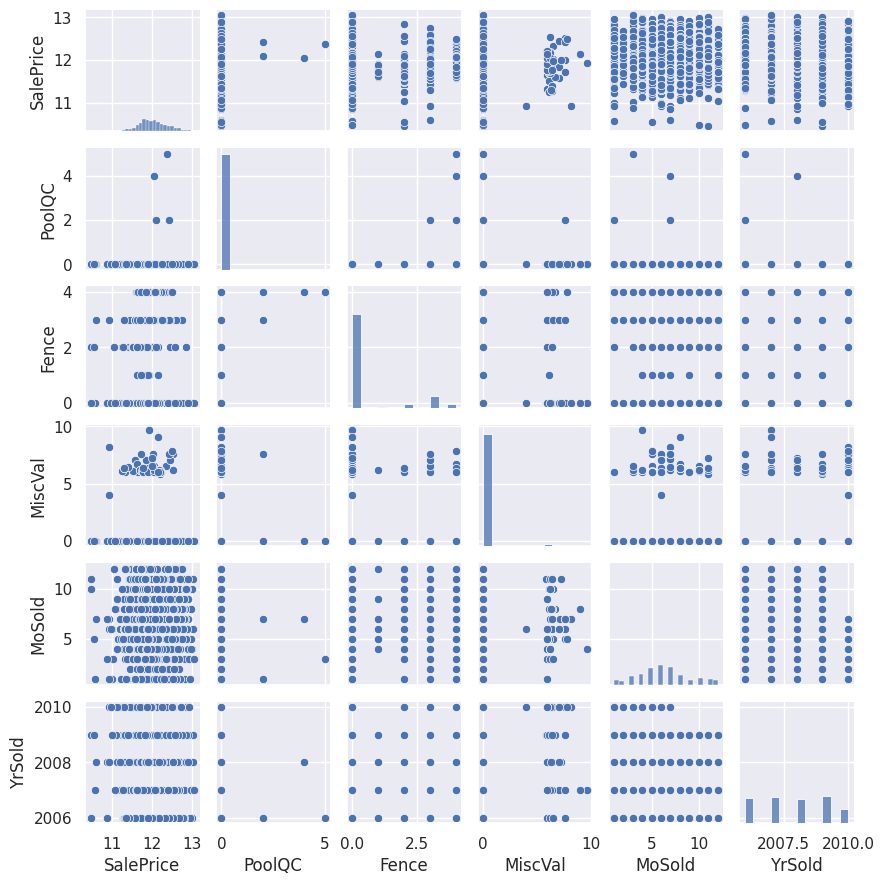

In [ ]:
## Following varaibles need to be considered based on the pariwise scatter plot 

# ["2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr"]
# ["Fireplaces", "GarageCars", 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
conti_var = train_wo_out[train_wo_out.columns[train_wo_out.dtypes!=np.object]].columns.tolist()[1:-1]
for i in range(0,len(conti_var),10):
    sns.set()
    cols = ['SalePrice'] + conti_var[i:i+10]
    sns.pairplot(train_wo_out[cols], size = 1.5)
    plt.show()

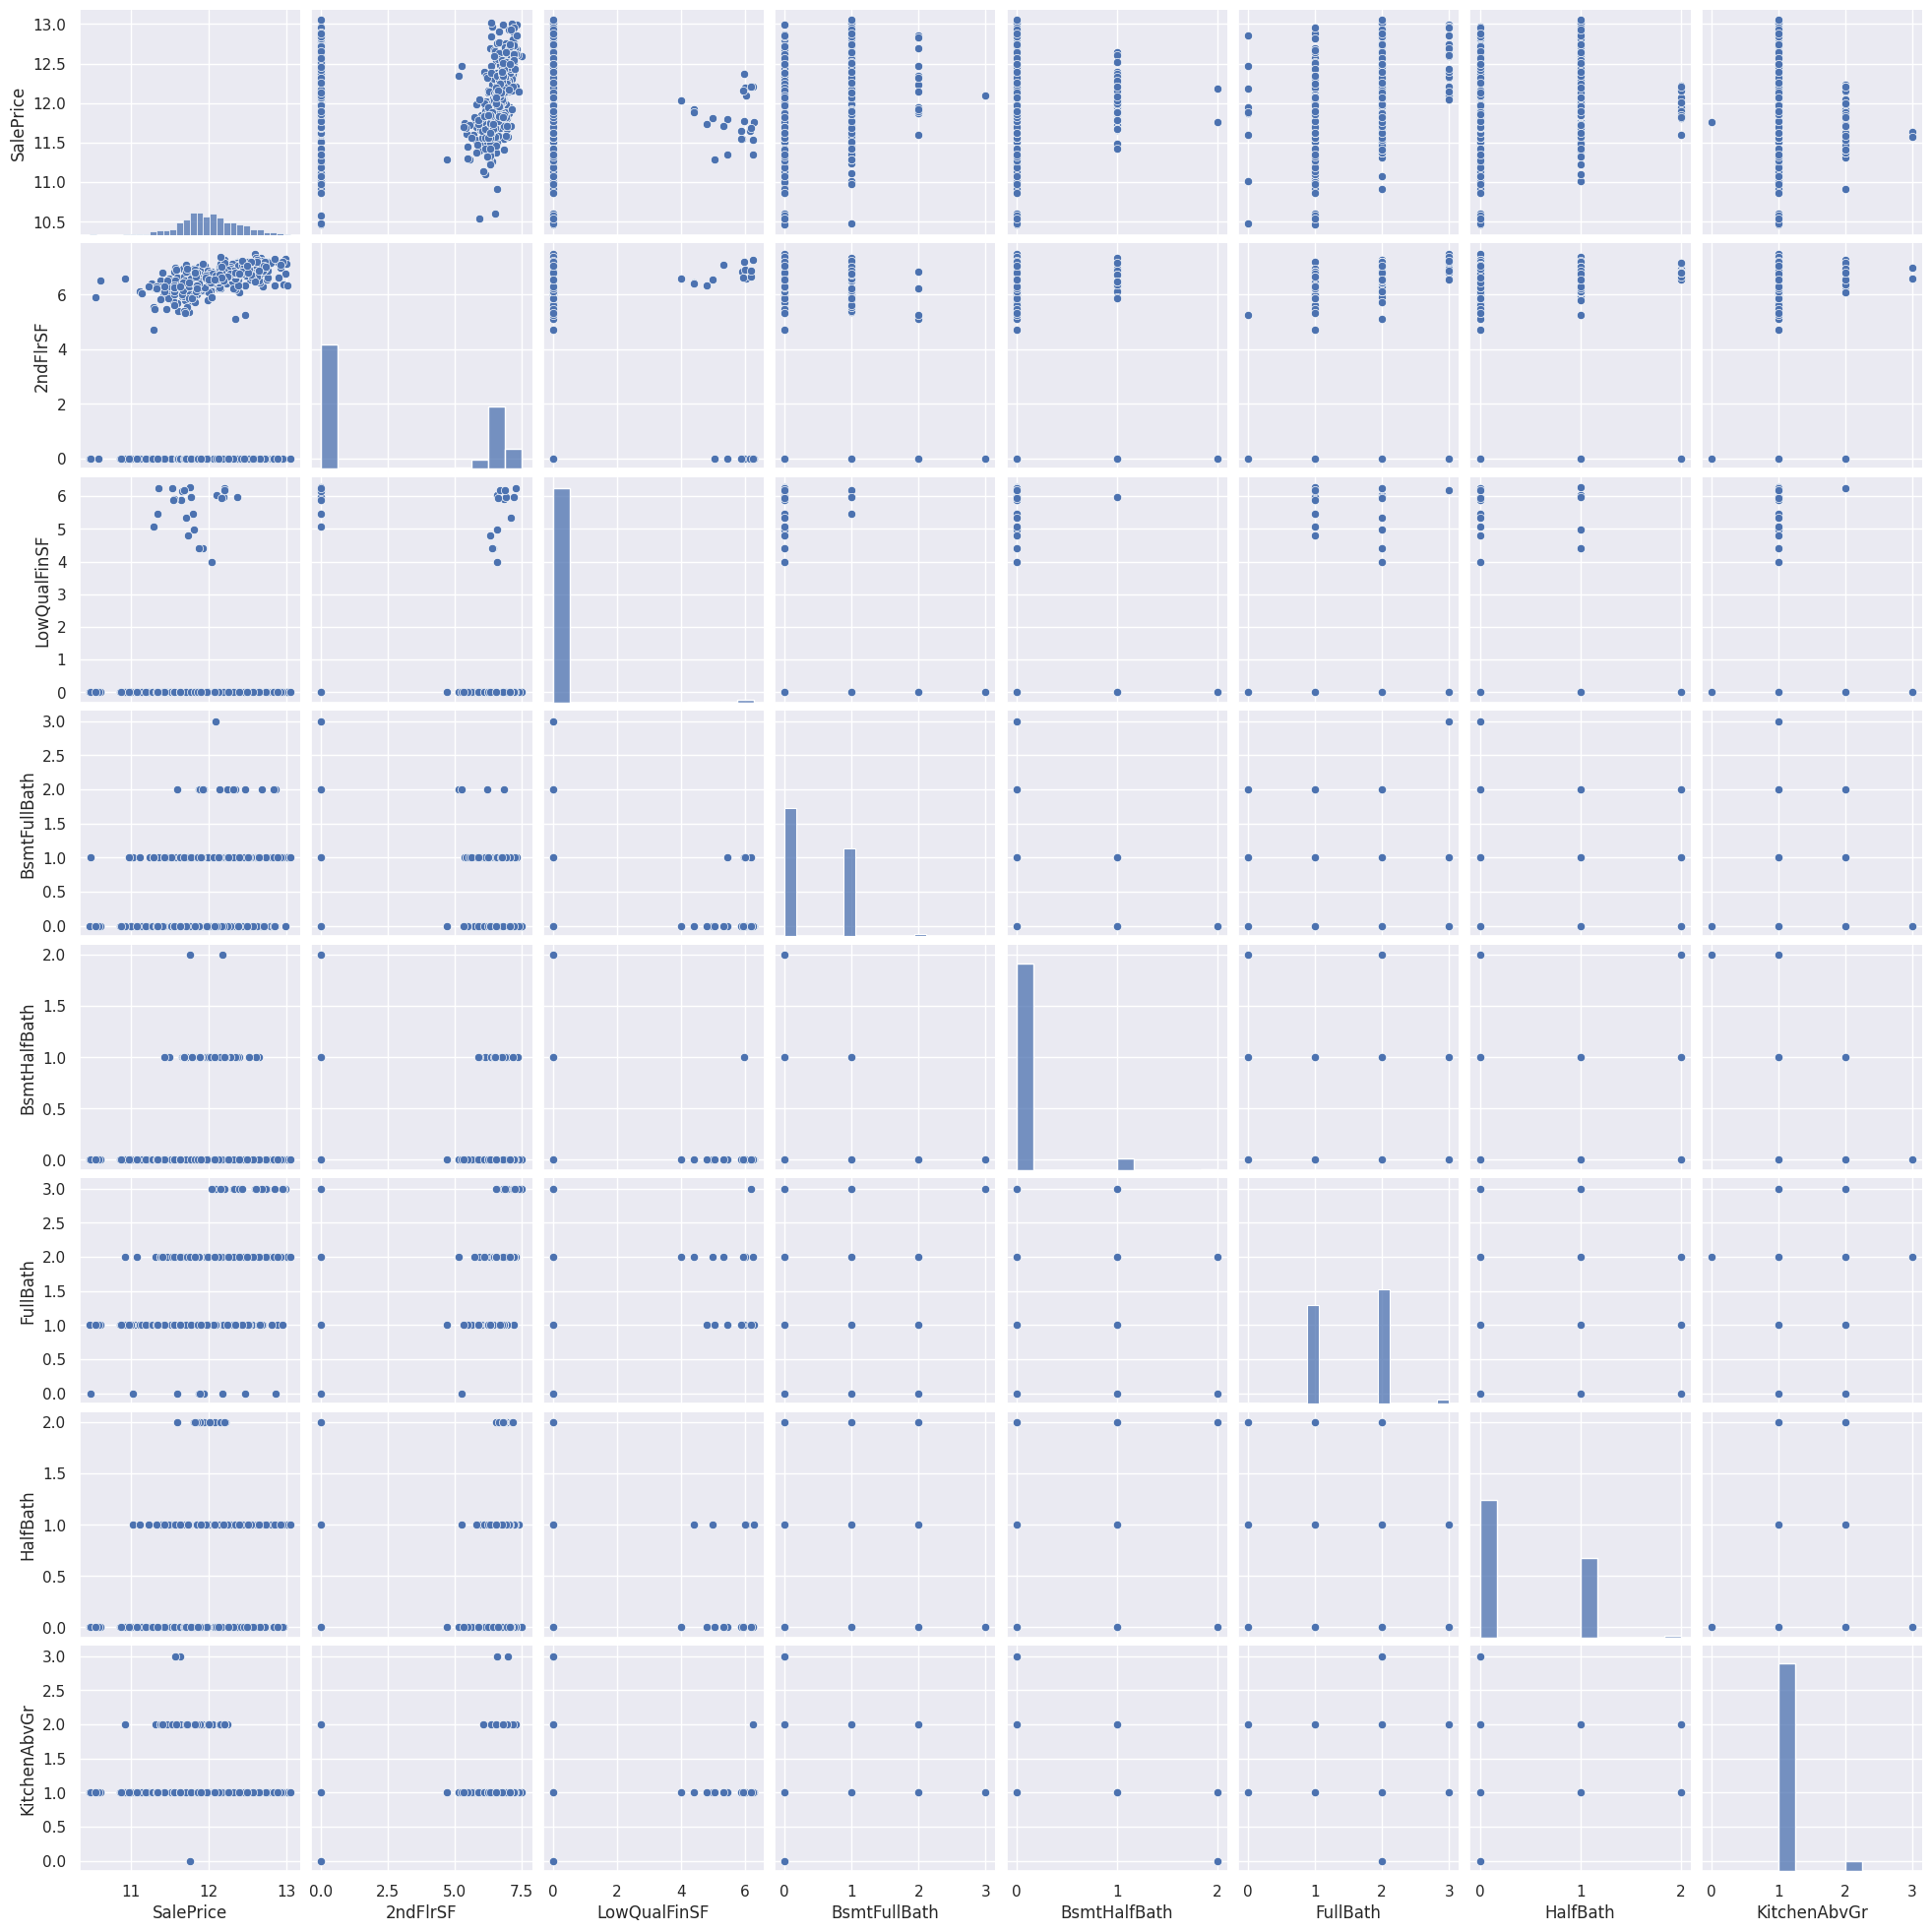

In [ ]:
## conti. variable
# ["2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr"]
# "2ndFlrSF" x "FullBath" to be the new parameter
cols = ['SalePrice', "2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "KitchenAbvGr"]
tmp = train_wo_out[cols]
sns.set()
sns.pairplot(tmp, size = 2.5)
plt.show()

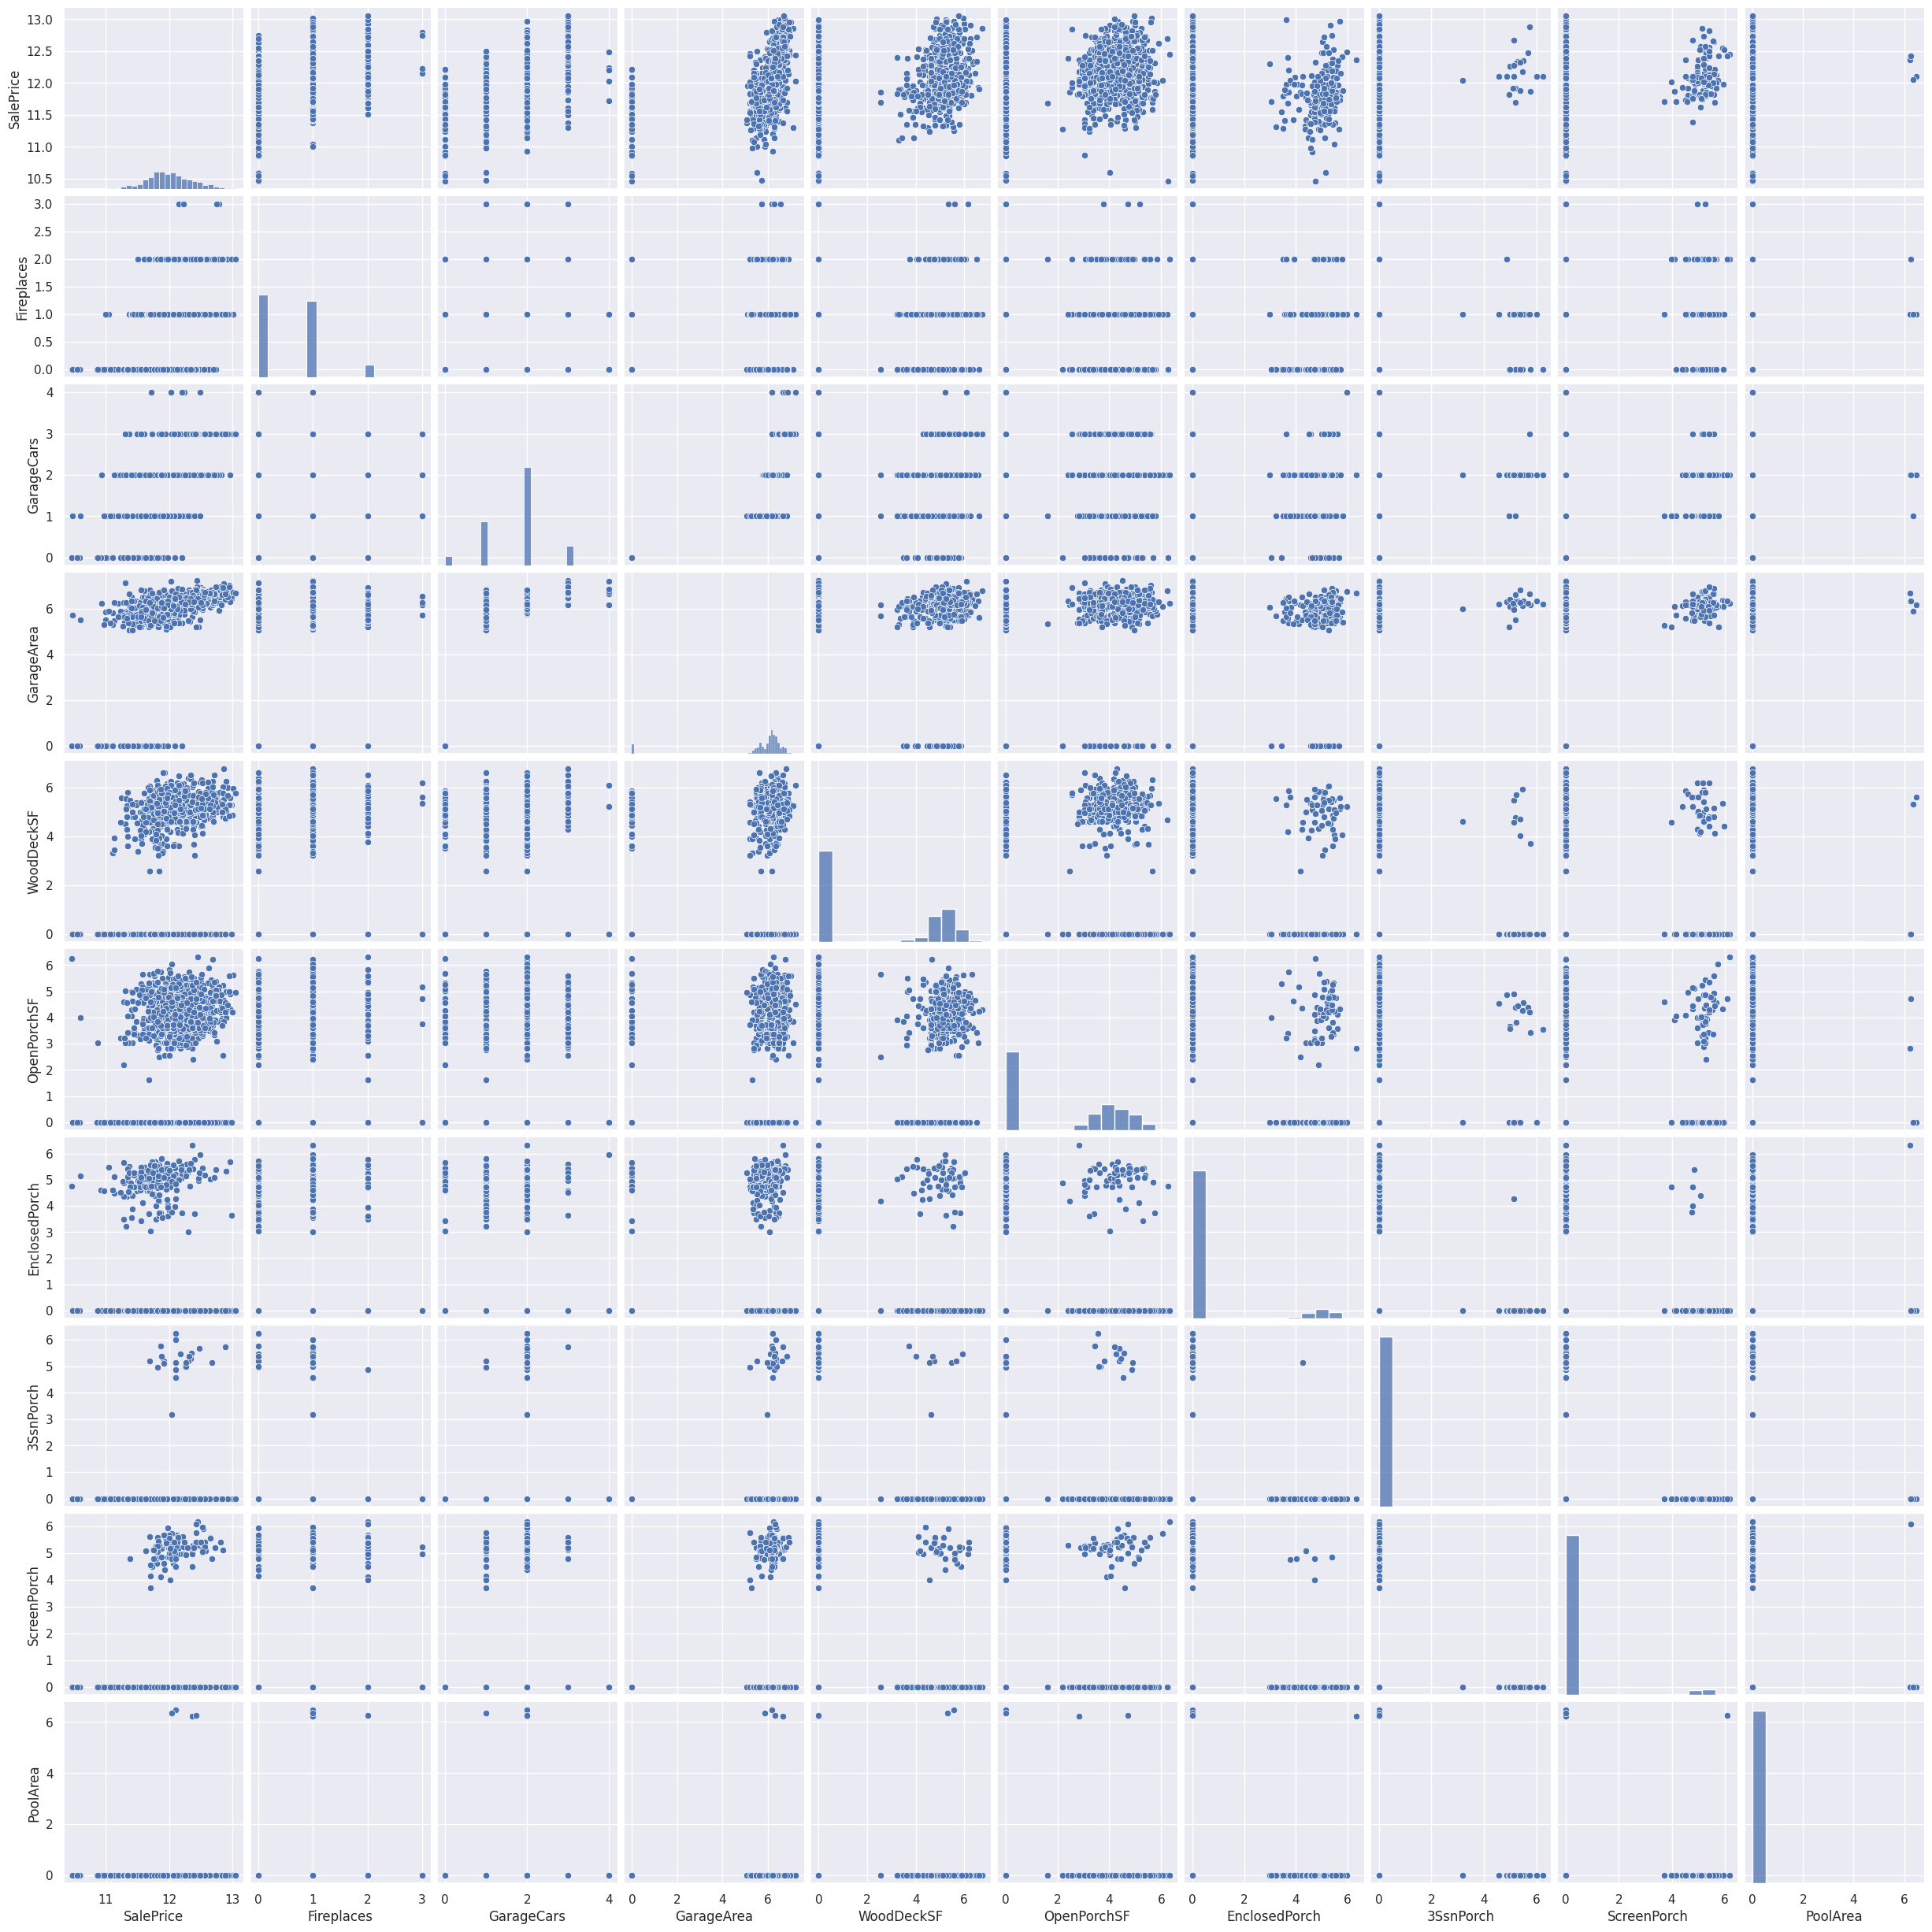

In [ ]:
# ["Fireplaces", "GarageCars", 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
# "GarageCars" x 'GarageArea' will be the new parameter
cols=['SalePrice', "Fireplaces", "GarageCars", 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
tmp = train_wo_out[cols]
sns.set()
sns.pairplot(tmp, size = 2.5)
plt.show()

In [ ]:
## generate new variable
train_wo_out = train_wo_out.assign(FullBath_n_2ndFlrSF = train_wo_out['FullBath'] * train_wo_out['2ndFlrSF'])
train_wo_out = train_wo_out.assign(GarageCars_n_GarageArea = train_wo_out["GarageCars"] * train_wo_out["GarageArea"])

In [ ]:
# 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea' these paramters has visible linear relation with log(SalesPrice+1); we transfer them to x**2
cols = ['TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea']
for col in cols:
  train_wo_out[col] = train_wo_out[col]**2

In [ ]:
# one- hot encoding for all np.object columns
data_dum = pd.get_dummies(train_wo_out)
train_wo_out = pd.DataFrame(data_dum)

In [ ]:
# filled up Nans in numeric columns with KNN　neighborhood 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) 
imputed = imputer.fit_transform(train_wo_out) 
train_wo_out_KNN = pd.DataFrame(imputed, columns=train_wo_out.columns) 

In [ ]:
train_wo_out_KNN

Id  MSSubClass  LotFrontage   LotArea  Alley  OverallQual  \
0        1.0        60.0     4.189655  9.042040    0.0          7.0   
1        2.0        20.0     4.394449  9.169623    0.0          6.0   
2        3.0        60.0     4.234107  9.328212    0.0          7.0   
3        4.0        70.0     4.110874  9.164401    0.0          7.0   
4        5.0        60.0     4.442651  9.565284    0.0          8.0   
...      ...         ...          ...       ...    ...          ...   
1432  1456.0        60.0     4.143135  8.976894    0.0          6.0   
1433  1457.0        20.0     4.454347  9.486152    0.0          6.0   
1434  1458.0        70.0     4.204693  9.109746    0.0          7.0   
1435  1459.0        20.0     4.234107  9.181735    0.0          5.0   
1436  1460.0        20.0     4.330733  9.204121    0.0          5.0   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  SaleType_ConLw  \
0             5.0     2003.0        2003.0    5.283204  ...             0.0   
1             8.0     1976.0        1976.0    0.000000  ...             0.0   
2             5.0     2001.0        2002.0    5.093750  ...             0.0   
3             5.0     1915.0        1970.0    0.000000  ...             0.0   
4             5.0     2000.0        2000.0    5.860786  ...             0.0   
...           ...        ...           ...         ...  ...             ...   
1432          5.0     1999.0        2000.0    0.000000  ...             0.0   
1433          6.0     1978.0        1988.0    4.787492  ...             0.0   
1434          9.0     1941.0        2006.0    0.000000  ...             0.0   
1435          6.0     1950.0        1996.0    0.000000  ...             0.0   
1436          6.0     1965.0        1965.0    0.000000  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1432           0.0           0.0          1.0                    0.0   
1433           0.0           0.0          1.0                    0.0   
1434           0.0           0.0          1.0                    0.0   
1435           0.0           0.0          1.0                    0.0   
1436           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1432                    0.0                   0.0                   0.0   
1433                    0.0                   0.0                   0.0   
1434                    0.0                   0.0                   0.0   
1435                    0.0                   0.0                   0.0   
1436                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1432                   1.0                    0.0  
1433                   1.0